In [1]:
from __future__ import division
import glob
import os
import sys
import random
from collections import OrderedDict
import pyfastaq
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
from pistis import plots, utils
%matplotlib inline
sns.set(style='whitegrid')

/Users/mbhall88/Projects/pistis/pistis/plots.py:13: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/mbhall88/.local/share/virtualenvs/pistis-YDjQaTdf/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/mbhall88/.local/share/virtualenvs/pistis-YDjQaTdf/lib/python3.6/site-packages/traitlets/config/application.py", l

In [5]:
bin_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11-20', 
             '21-50', '51-100', '101-200', '201-300', '301-1000', '1001-10000', '>10000']
bin_starts = np.append(np.arange(11), np.array([21, 51, 101, 201, 301, 1001, 10001, None]))
read_length = 11000
reads = 700

In [6]:
# data = iter(
#     random.choices(range(50), k=read_length)
#     list(np.random.randint(low=0, high=50, size=read_length, dtype=np.int8))
#     for _ in range(reads)
# )
data = [
    random.choices(range(50), k=read_length)
    for _ in range(reads)
]
# data = [
#     range(4),
#     range(13),
#     range(204)
# ]

In [ ]:
# %%timeit -n 5 -r 3
d = OrderedDict()
for row in data:
    for i, (idx, name) in enumerate(zip(bin_starts[:-1], bin_names)):
        if not name in d.keys():
            d[name] = []
        d[name].extend(row[idx: bin_starts[i+1]])  
fig, ax = plt.subplots()
p=sns.violinplot(data=d, ax=ax, order=list(d.keys()))
# _=p.set_xticklabels(bin_names)

In [ ]:
len(data) * len(data[0])

In [ ]:
len([x for xs in d.values() for x in xs])

In [ ]:
p=sns.boxplot(data=[list(x) for x in d.values()], cut=0)
_=p.set_xticklabels(bin_names, rotation=45)

In [ ]:
len(d['11-20'])

In [ ]:
%%timeit -n 5 -r 3
df_start = utils.bin_quality_scores_by_position(data, shape=(len(data), read_length))

In [7]:
fname = '../tests/data/reads.fastq.gz'
fq = pyfastaq.sequences.file_reader(fname, read_quals=True)
(gc_content,
     read_lengths,
     mean_quality_scores,
     df_start, df_end) = utils.collect_fastq_data(data)

AttributeError: 'list' object has no attribute 'gc_content'

# GC Content

In [ ]:
__ = plots.gc_plot(gc_content)

# Read Length vs Mean Read Quality Score

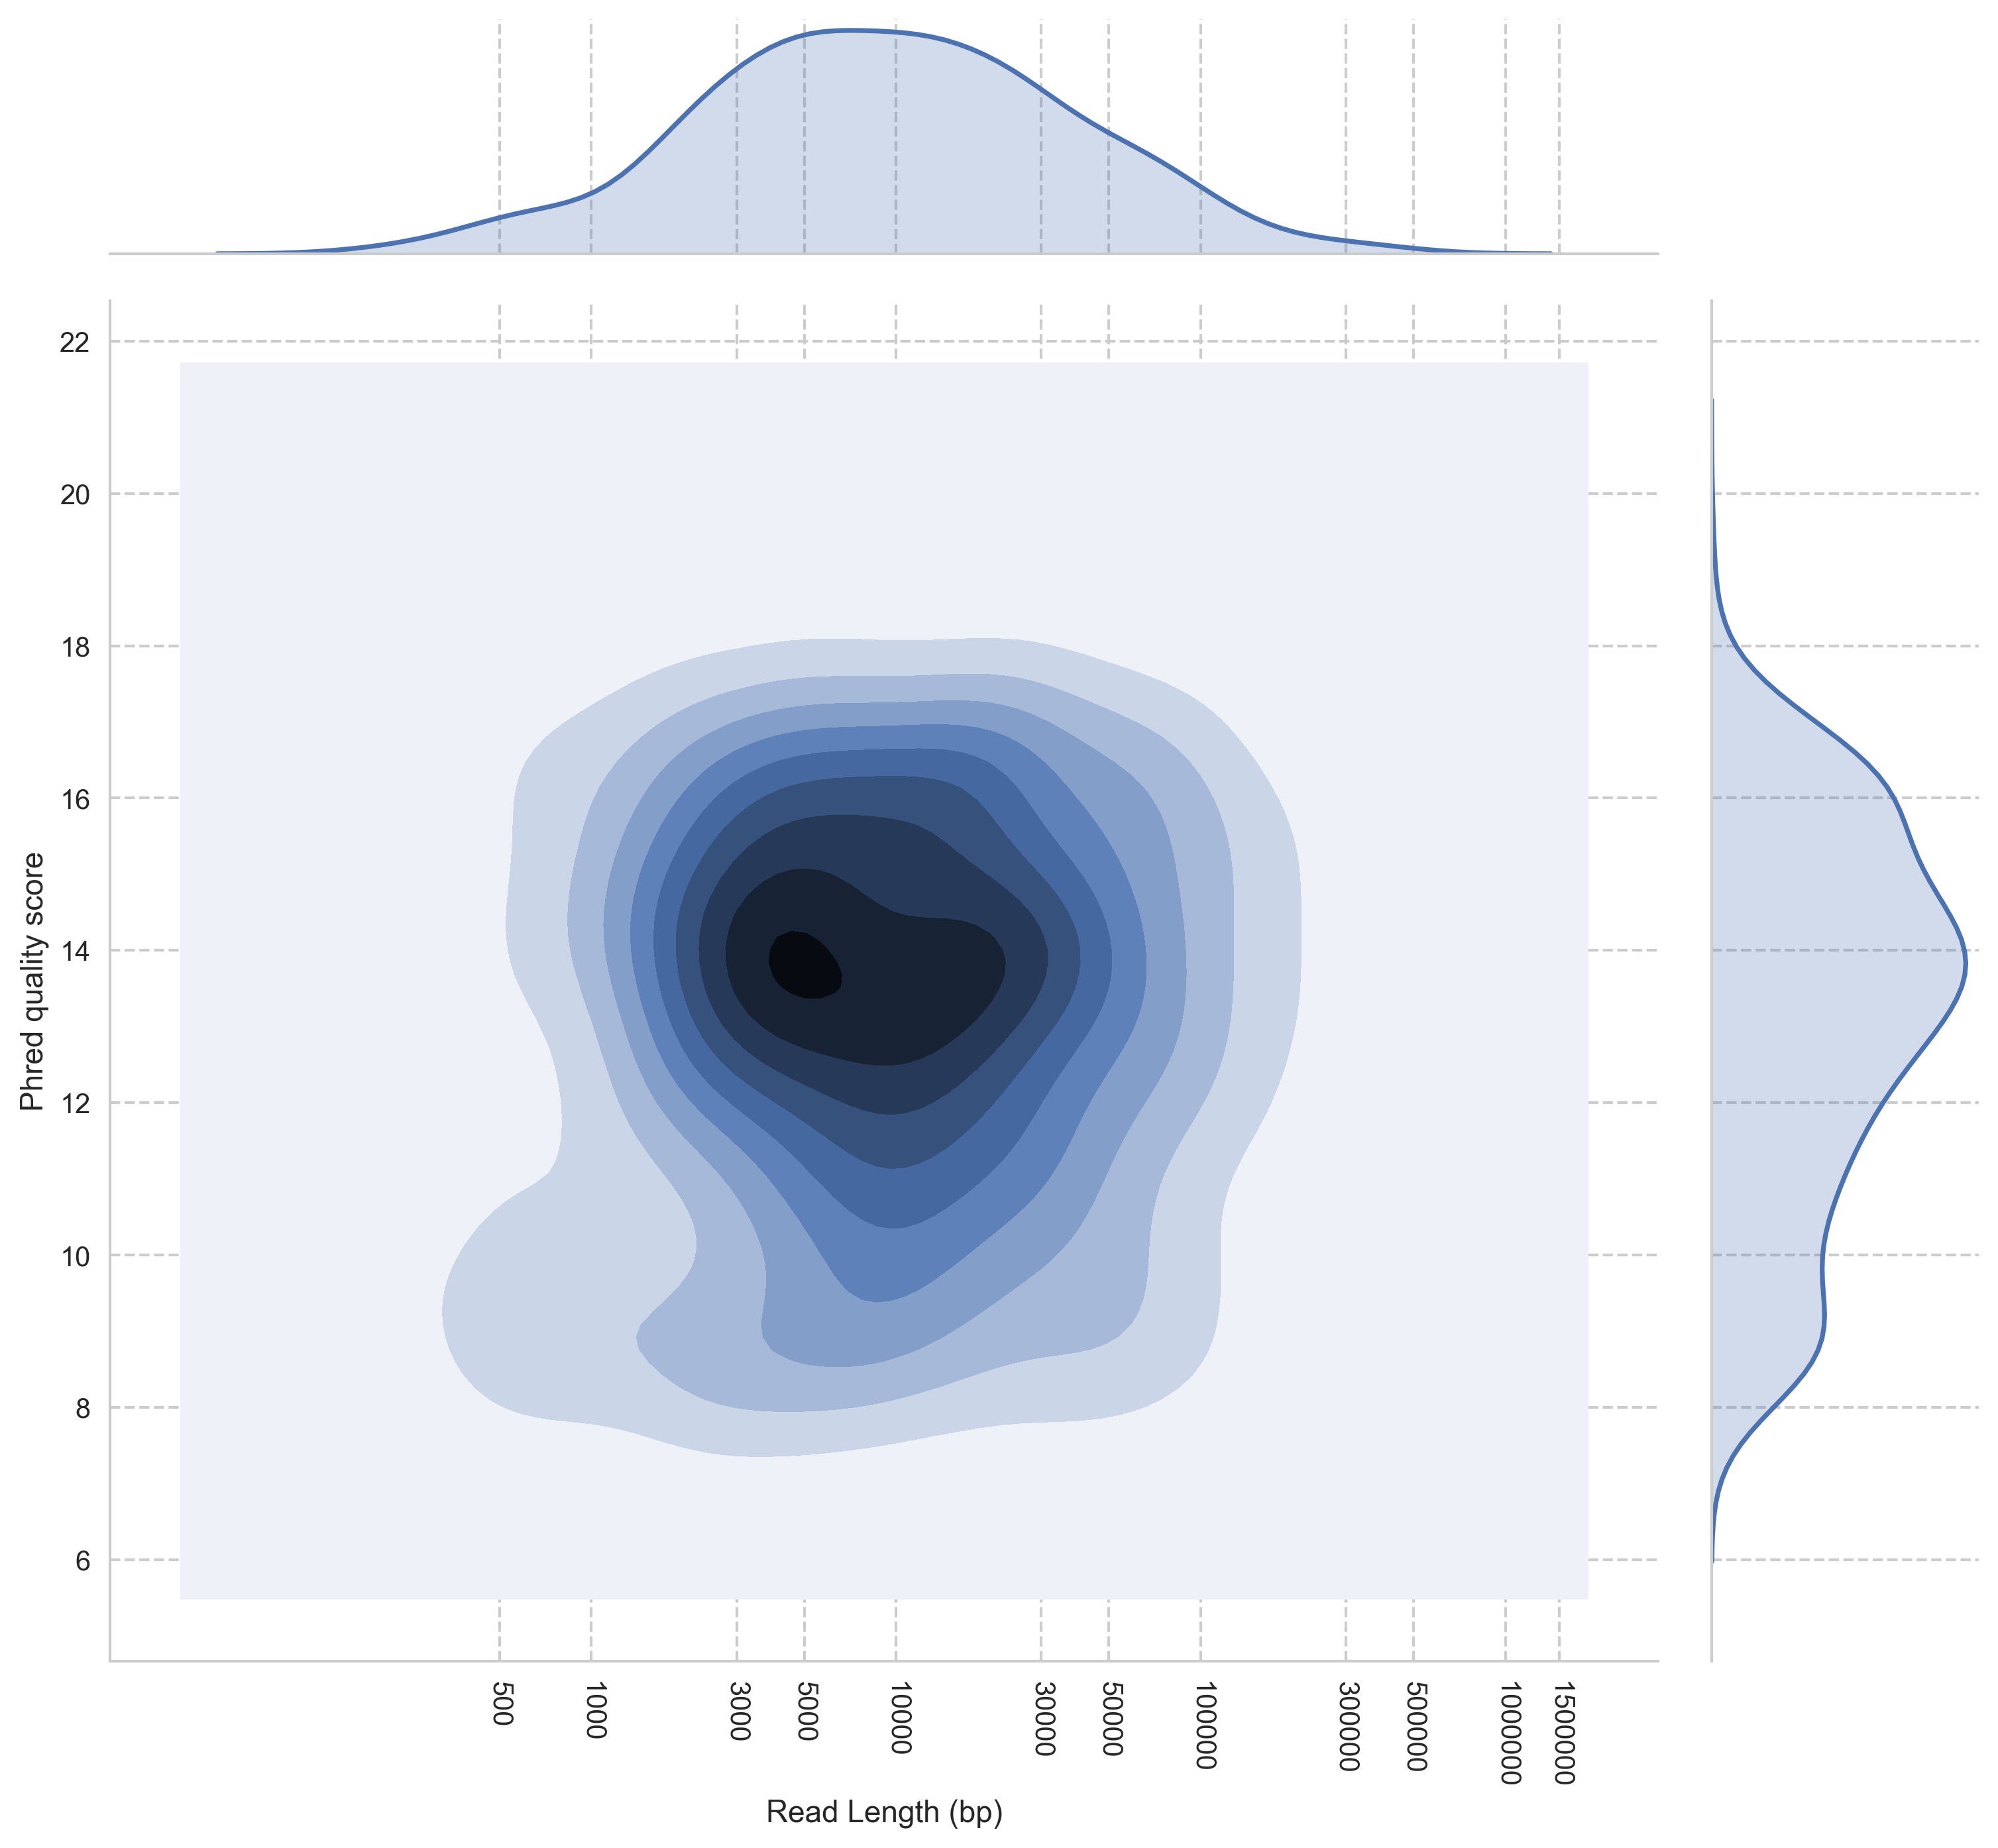

In [4]:
p = plots.length_vs_qual_plot(read_lengths, mean_quality_scores)

# Plot quality score across reads in bins

In [ ]:
__ = plots.quality_per_position(df_start, 'start')

In [ ]:
__ = plots.quality_per_position(df_end, 'end')

# Save plots to a single PDF

In [ ]:
save_as = 'foo.pdf'

plot1 = gc_plot(gc_content)
plot2 = length_vs_qual_plot(read_len, mean_qual)
plot3 = quality_per_position(df_start, 'start')
plot4 = quality_per_position(df_end, 'end')
pp = PdfPages(save_as)
pp.savefig(plot1)
pp.savefig(plot2)
pp.savefig(plot3)
pp.savefig(plot4)
pp.close()

# Mean positional quality score for first *n* bases

In [ ]:
def read_end_quality(all_q_scores, length_from_end, from_end='start'):
    linewidth = 1.5
    size = (11.7, 8.27)  # A4
    from_end = from_end.lower()
    dpi = 300
    xlabel = 'Distance from end of read (bp)'
    ylabel = 'Mean quality (Phred) score'
    title = 'Average quality at the {} of the reads'.format(from_end)
    ylim = (0, 50)

    first_n_qscores = []
    for qscores in all_qscores:
        if from_end == 'start':
            qs = qscores[:length_from_end]
        elif from_end == 'end':
            qs = qscores[-length_from_end:]
        first_n_qscores.append(qs)

    xs = [0] * length_from_end
    for i, scores in enumerate(first_n_qscores):
        for j, s in enumerate(scores):
            xs[j] += s

    num_qscores = len(first_n_qscores)
    for i, s in enumerate(xs):
        xs[i] /= num_qscores
    fig, ax = plt.subplots(figsize=size, dpi=dpi)
    p = ax.plot(xs, linewidth=linewidth)
    if from_end == 'end':
        __ = ax.set_xticks(np.arange(0, length_from_end+1, length_from_end//6))
        __ = ax.set_xticklabels(np.arange(0, length_from_end+1, length_from_end//6)[::-1])
        
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title, ylim=ylim)
    sns.despine()
    return fig

In [ ]:
length = 300
__ = read_end_quality(all_qscores, length)

# Mean positional quality score for last *n* bases

In [ ]:
__ = read_end_quality(all_qscores, length, from_end='end')

In [ ]:
plt.style.use('ggplot')

data = df_start
FIGURE_SIZE = (11.7, 8.27)
DPI = 300
from_end = 'start'
if from_end.lower() == 'start':
    col_names = data.columns
elif from_end.lower() == 'end':
    col_names = data.columns[::-1]
else:
    raise Exception("'start' and 'end' are the only options allowed for "
                    "plotting quality per position.")

title = 'Quality score across reads, from the {}'.format(from_end)
xlabel = 'Read position (bp)'
ylabel = 'Phred Quality Score'
cut = 0  # cuts the violin plot at max and min values (doesn't extrapolate)

fig, axes = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)
# plot = sns.stripplot(data=data, ax=axes, order=col_names, jitter=True)
plot = sns.violinplot(data=data, ax=axes, order=col_names)
plot.set(xlabel=xlabel, ylabel=ylabel, title=title)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
sns.despine()

In [ ]:
df = df_start.melt(var_name='p', value_name='q')

In [ ]:
plt.scatter(x=df['p'], y=df['q'])